In [1]:
!pip install ultralytics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [2]:
!pip install "numpy<2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 94.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.
datasets 4.1.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires google-auth==2.38.0, but you 

In [3]:
import numpy as np
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import yaml

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
import kagglehub

path = kagglehub.dataset_download("saathvik16/bdd10k-object-detection-with-yolo-format-labels")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bdd10k-object-detection-with-yolo-format-labels


In [5]:
data_yaml_content = """
train: /kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/train/images
val: /kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/val/images
test: /kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/test/images

nc: 10

names:
  0: bike
  1: bus
  2: car
  3: motor
  4: person
  5: rider
  6: traffic light
  7: traffic sign
  8: train
  9: truck
"""
dataset_yaml_path = '/kaggle/working/data.yaml'
with open(dataset_yaml_path, 'w') as f:
    f.write(data_yaml_content)

print(f"data.yaml created at: {dataset_yaml_path}")

data.yaml created at: /kaggle/working/data.yaml


In [6]:
early_exit_weights_path = "/kaggle/input/yolov8m-weights-trained-early-and-final/yolov8m_early_exit_dual_scale.pt"
final_exit_weights_path = "/kaggle/input/yolov8m-weights-trained-early-and-final/yolov8m_final_exit.pt"

In [7]:
val_imgs_dir = "/kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/val/images"
val_labels_dir = "/kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/val/labels"

train_imgs_dir = "/kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/train/images"
train_labels_dir = "/kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/train/labels"

test_imgs_dir = "/kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/test/images"
test_labels_dir = "/kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/test/labels"

dataset_yaml_path = '/kaggle/working/data.yaml'

In [8]:
model_early = YOLO(early_exit_weights_path).to('cuda:0')
model_final = YOLO(final_exit_weights_path).to('cuda:1')

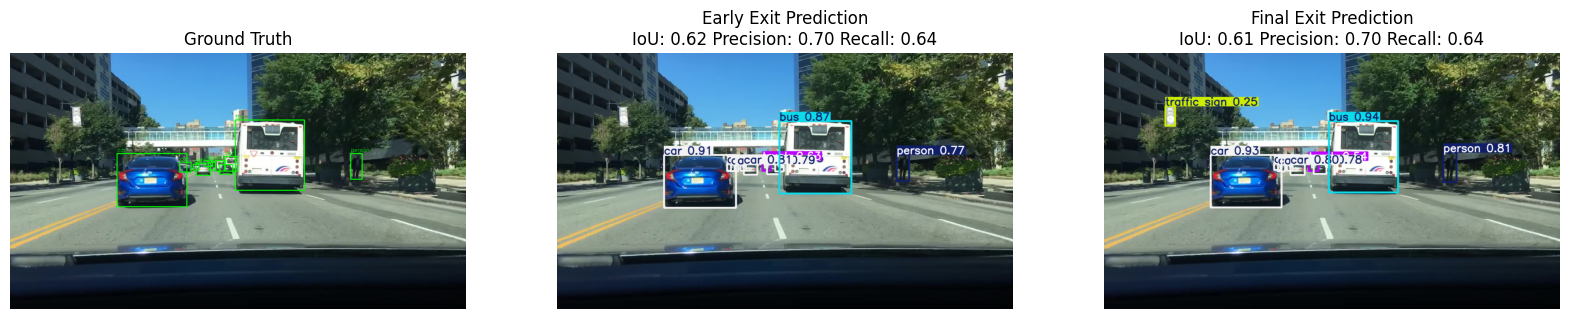

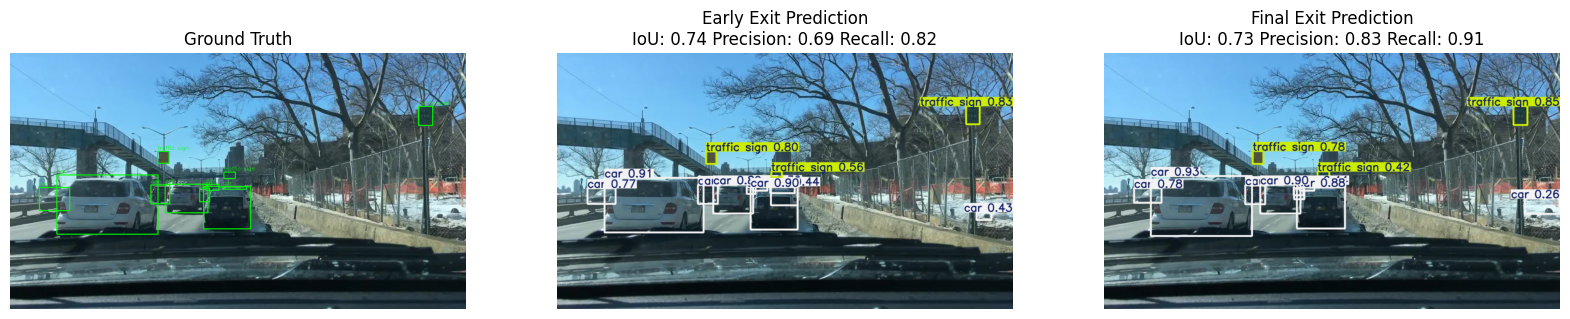

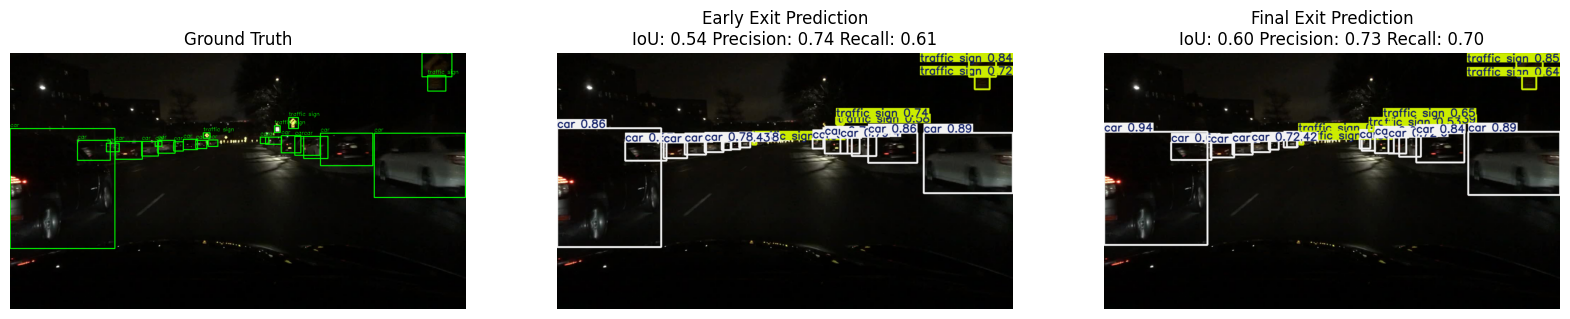

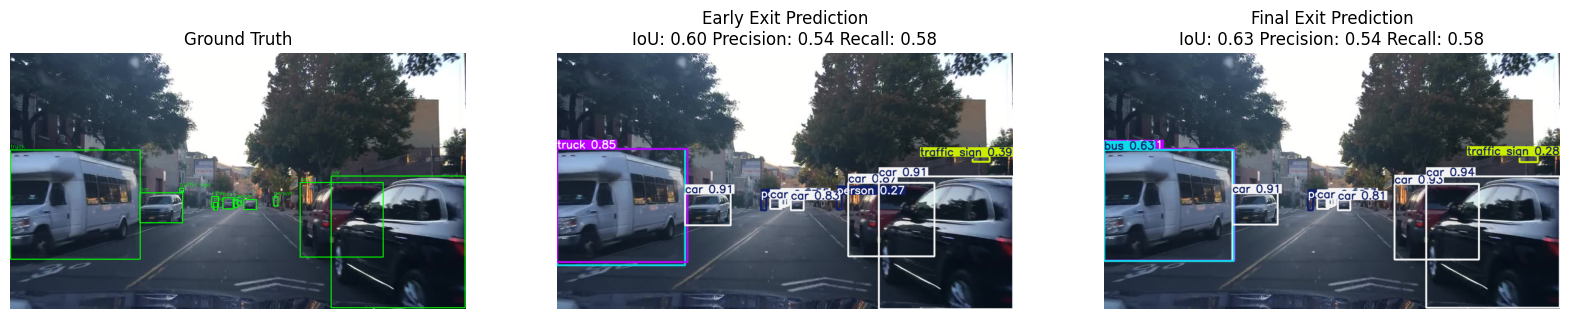

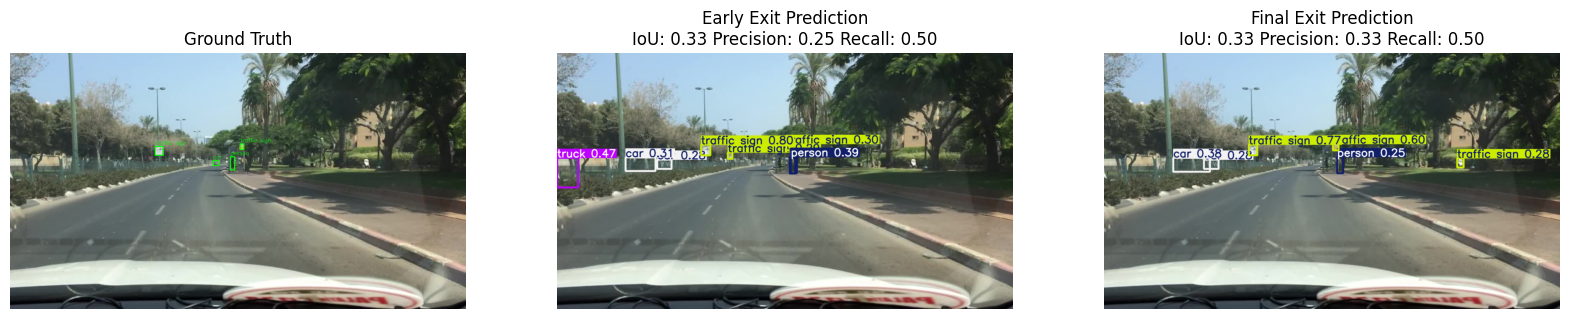

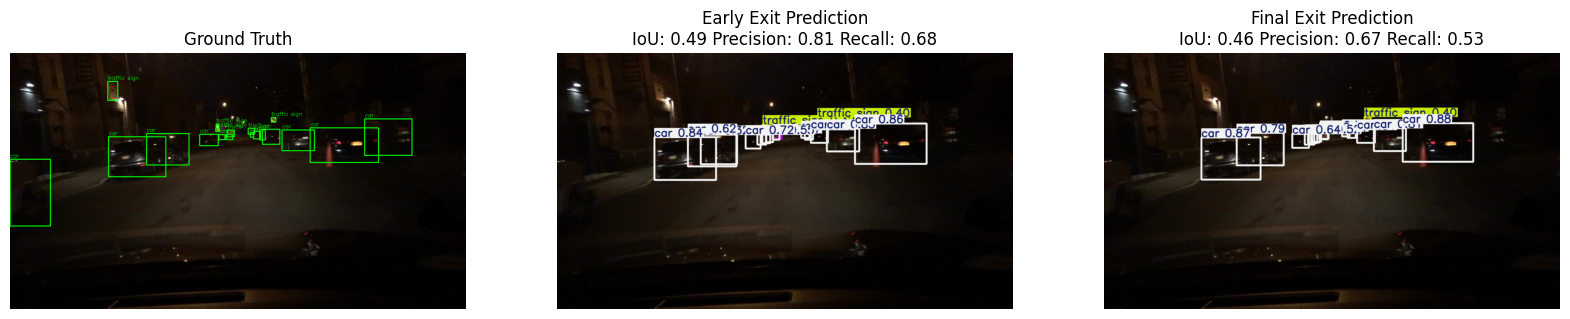

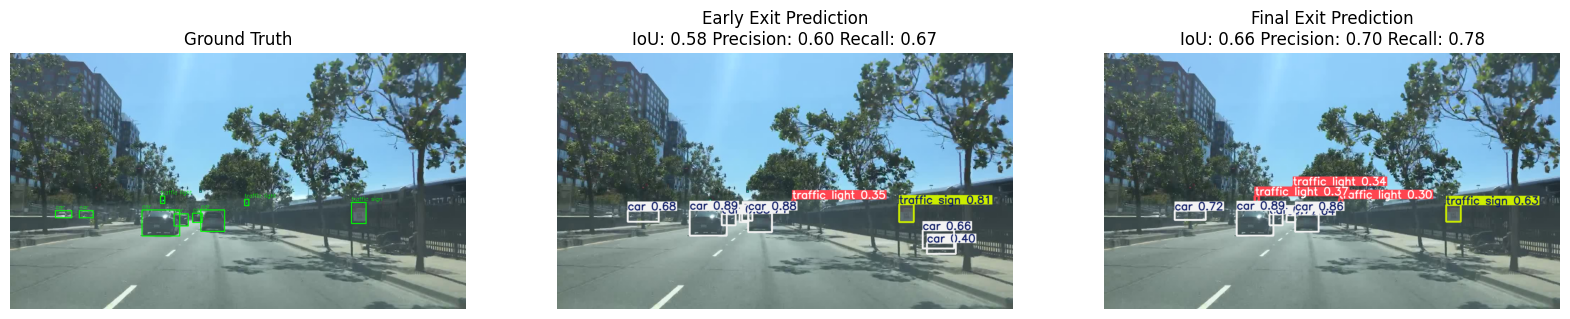

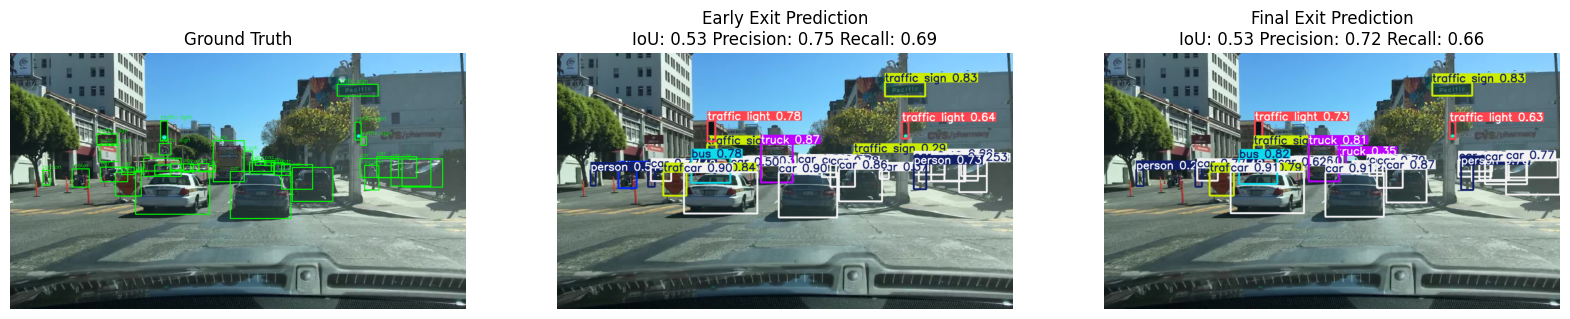

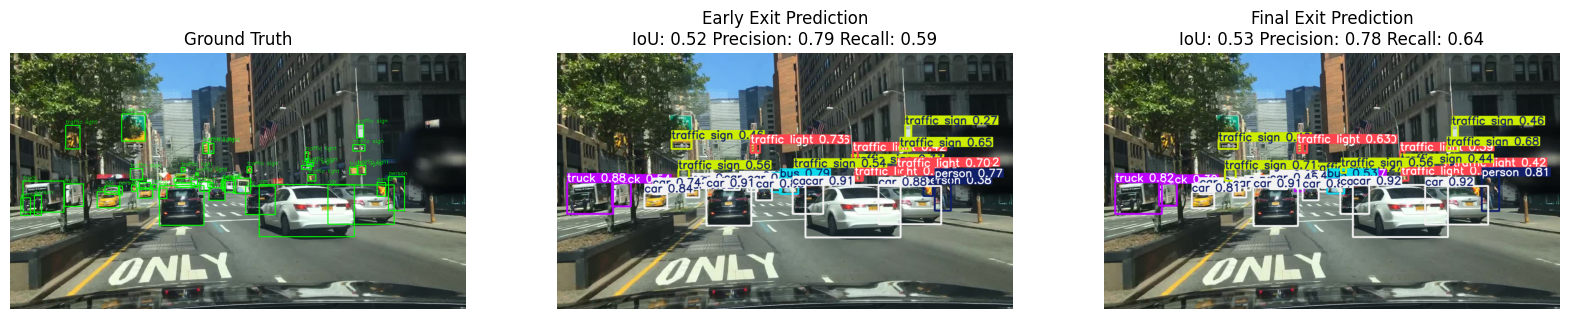

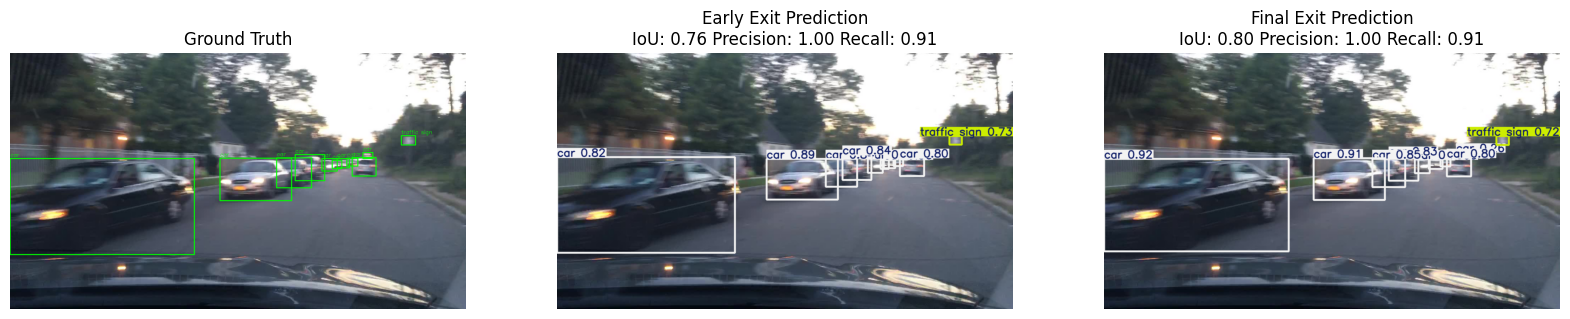

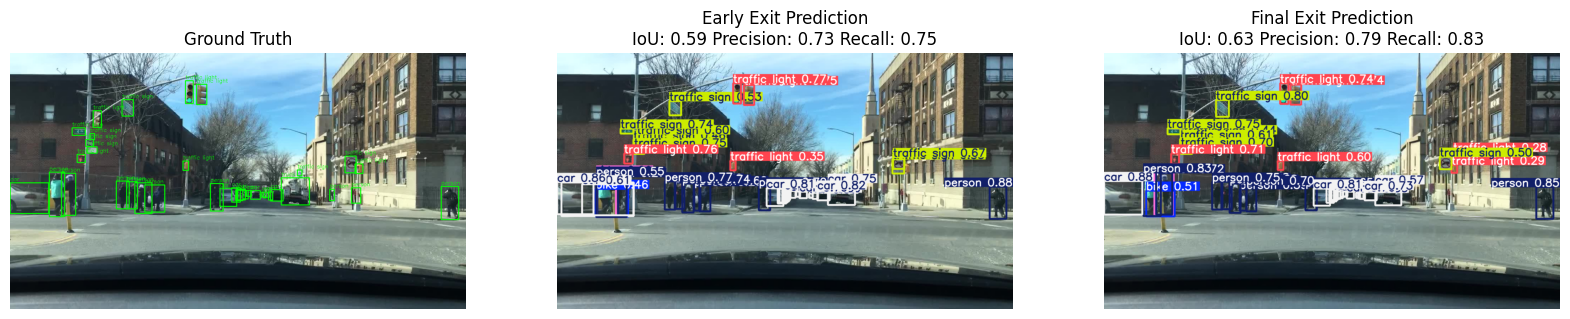

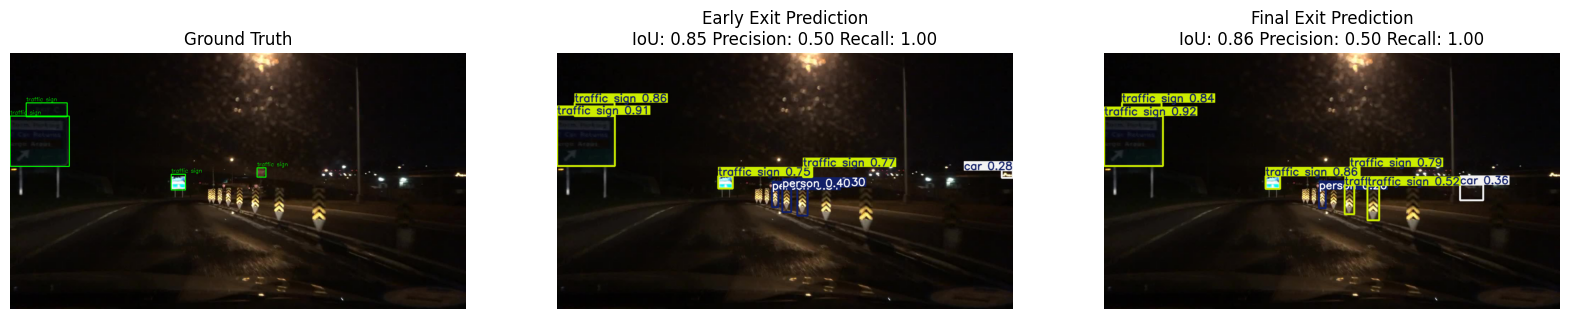

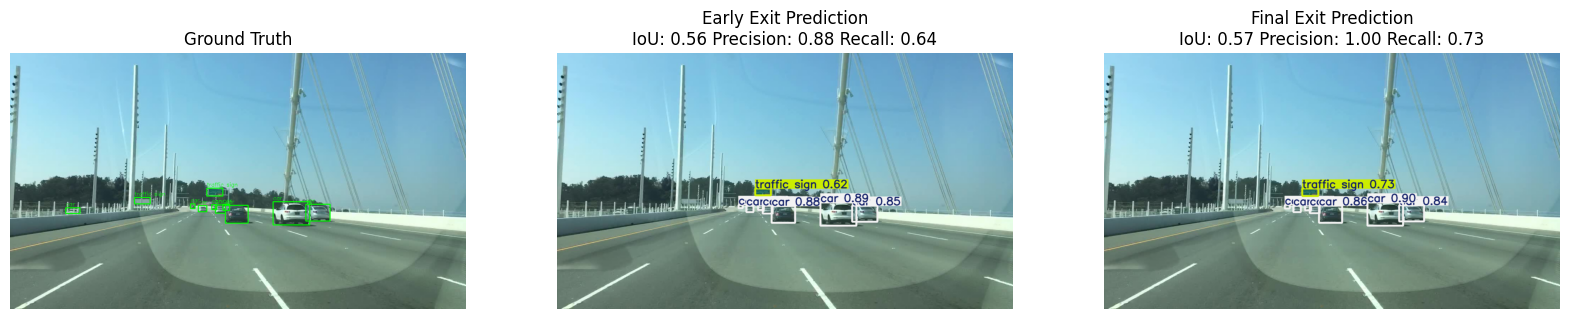

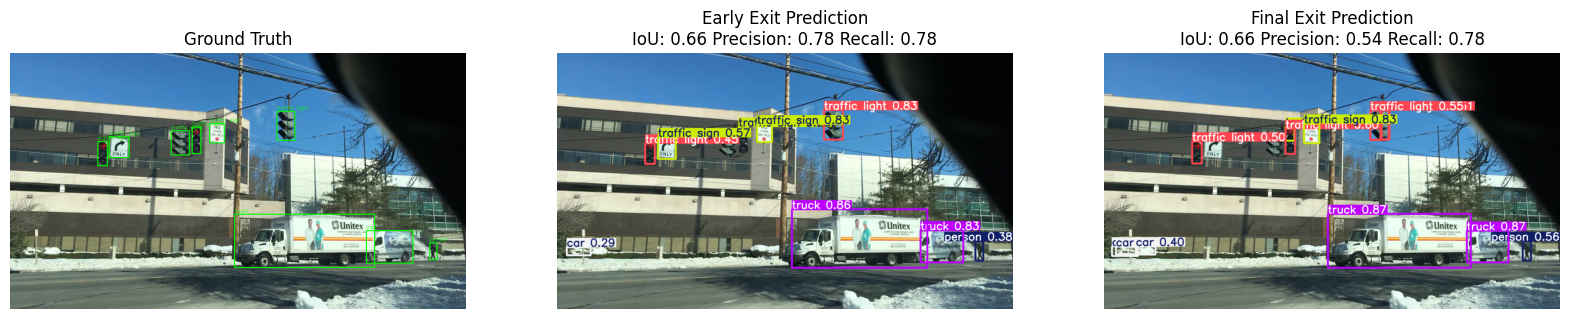

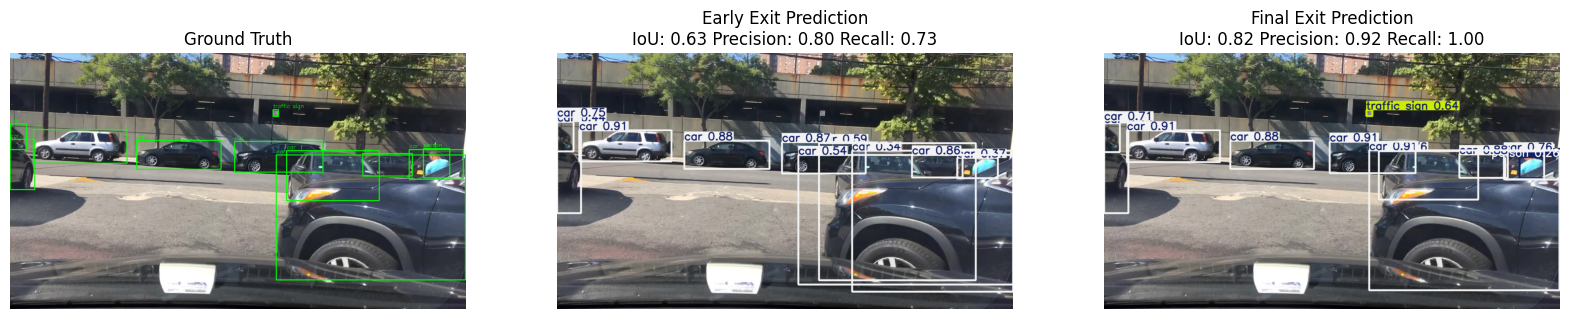

In [9]:
with open(dataset_yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)
class_names = data_yaml['names']

def yolo_to_xyxy(bbox_norm, img_shape):
    h, w = img_shape[:2]
    x_c, y_c, bw, bh = bbox_norm
    x1 = int((x_c - bw / 2) * w)
    y1 = int((y_c - bh / 2) * h)
    x2 = int((x_c + bw / 2) * w)
    y2 = int((y_c + bh / 2) * h)
    return x1, y1, x2, y2

def draw_boxes(img, boxes, color=(0, 255, 0), thickness=2, labels=None):
    img_copy = img.copy()
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = box
        cv2.rectangle(img_copy, (x1, y1), (x2, y2), color, thickness)
        if labels:
            label_text = labels[i]
            cv2.putText(img_copy, label_text, (x1, max(y1 - 5, 0)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    return img_copy

def bbox_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = max(0, box1[2] - box1[0]) * max(0, box1[3] - box1[1])
    box2_area = max(0, box2[2] - box2[0]) * max(0, box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    if union_area == 0:
        return 0.0
    else:
        return inter_area / union_area

def mean_iou(gt_boxes, pred_boxes):
    if len(gt_boxes) == 0 or len(pred_boxes) == 0:
        return 0.0
    ious = []
    for gt in gt_boxes:
        ious_per_gt = [bbox_iou(gt, pred) for pred in pred_boxes]
        if ious_per_gt:
            ious.append(max(ious_per_gt))
    return np.mean(ious) if ious else 0.0

def compute_tp_fp_fn(gt_boxes, pred_boxes, iou_thr=0.5):
    matched_gt = set()
    matched_pred = set()
    for i, gt in enumerate(gt_boxes):
        best_iou = 0
        best_idx = -1
        for j, pred in enumerate(pred_boxes):
            iou = bbox_iou(gt, pred)
            if iou > best_iou:
                best_iou = iou
                best_idx = j
        if best_iou >= iou_thr:
            matched_gt.add(i)
            matched_pred.add(best_idx)
    TP = len(matched_gt)
    FP = len(pred_boxes) - len(matched_pred)
    FN = len(gt_boxes) - len(matched_gt)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    return TP, FP, FN, precision, recall

all_img_names = os.listdir(val_imgs_dir)
random.shuffle(all_img_names)
sample_img_names = all_img_names[:15]

for img_name in sample_img_names:
    img_path = os.path.join(val_imgs_dir, img_name)
    label_path = os.path.join(val_labels_dir, img_name.replace('.jpg', '.txt'))

    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    gt_boxes = []
    gt_labels = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f.readlines():
                cls_idx, *bbox = line.strip().split()
                bbox = list(map(float, bbox))
                xyxy = yolo_to_xyxy(bbox, img.shape)
                gt_boxes.append(xyxy)
                class_idx = int(cls_idx)
                gt_labels.append(class_names[class_idx])

    img_gt = draw_boxes(img_rgb, gt_boxes, color=(0, 255, 0), labels=gt_labels)

    results_early = model_early.predict(img_path, imgsz=640, conf=0.25, verbose=False)
    img_pred_early = results_early[0].plot()
    pred_boxes_early = results_early[0].boxes.xyxy.cpu().numpy().tolist() if len(results_early[0].boxes) > 0 else []

    results_final = model_final.predict(img_path, imgsz=640, conf=0.25, verbose=False)
    img_pred_final = results_final[0].plot()
    pred_boxes_final = results_final[0].boxes.xyxy.cpu().numpy().tolist() if len(results_final[0].boxes) > 0 else []

    # Compute metrics
    iou_early = mean_iou(gt_boxes, pred_boxes_early)
    TP_e, FP_e, FN_e, prec_e, rec_e = compute_tp_fp_fn(gt_boxes, pred_boxes_early)

    iou_final = mean_iou(gt_boxes, pred_boxes_final)
    TP_f, FP_f, FN_f, prec_f, rec_f = compute_tp_fp_fn(gt_boxes, pred_boxes_final)

    fig, axs = plt.subplots(1, 3, figsize=(20, 7))
    axs[0].imshow(img_gt)
    axs[0].set_title('Ground Truth')
    axs[0].axis('off')

    axs[1].imshow(img_pred_early[..., ::-1])
    axs[1].set_title(f'Early Exit Prediction\nIoU: {iou_early:.2f} Precision: {prec_e:.2f} Recall: {rec_e:.2f}')
    axs[1].axis('off')

    axs[2].imshow(img_pred_final[..., ::-1])
    axs[2].set_title(f'Final Exit Prediction\nIoU: {iou_final:.2f} Precision: {prec_f:.2f} Recall: {rec_f:.2f}')
    axs[2].axis('off')

    plt.show()

In [10]:
def yolo_to_xyxy(bbox_norm, img_shape):
    h, w = img_shape[:2]
    x_c, y_c, bw, bh = bbox_norm
    x1 = int((x_c - bw / 2) * w)
    y1 = int((y_c - bh / 2) * h)
    x2 = int((x_c + bw / 2) * w)
    y2 = int((y_c + bh / 2) * h)
    return [x1, y1, x2, y2]

def bbox_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = max(0, box1[2] - box1[0]) * max(0, box1[3] - box1[1])
    box2_area = max(0, box2[2] - box2[0]) * max(0, box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    if union_area == 0:
        return 0.0
    return inter_area / union_area

In [11]:
def average_precision_per_image(gt_boxes, pred_boxes, pred_scores, iou_threshold=0.5):
    if len(pred_boxes) == 0:
        # No detections, AP = 0 if GT exists else 1
        return 0.0 if len(gt_boxes) > 0 else 1.0

    # Sort predictions by confidence descending
    pred_scores = np.array(pred_scores)
    sorted_inds = np.argsort(-pred_scores)
    pred_boxes = np.array(pred_boxes)[sorted_inds]
    pred_scores = np.array(pred_scores)[sorted_inds]

    tp = np.zeros(len(pred_boxes))
    fp = np.zeros(len(pred_boxes))
    matched_gt = set()

    for i, pred_box in enumerate(pred_boxes):
        ious = np.array([bbox_iou(pred_box, gt_box) for gt_box in gt_boxes])
        max_iou = 0 if len(ious) == 0 else ious.max()
        max_iou_idx = ious.argmax() if len(ious) > 0 else -1

        if max_iou >= iou_threshold and max_iou_idx not in matched_gt:
            tp[i] = 1  # True Positive
            matched_gt.add(max_iou_idx)
        else:
            fp[i] = 1  # False Positive

    cum_tp = np.cumsum(tp)
    cum_fp = np.cumsum(fp)

    recalls = cum_tp / len(gt_boxes) if len(gt_boxes) > 0 else np.zeros(len(tp))
    precisions = cum_tp / (cum_tp + cum_fp + 1e-16)

    # Append sentinel values for AP calculation
    recalls = np.concatenate(([0.0], recalls, [1.0]))
    precisions = np.concatenate(([0.0], precisions, [0.0]))

    # Make precision non-increasing
    for i in range(len(precisions) - 1, 0, -1):
        precisions[i-1] = max(precisions[i-1], precisions[i])

    recall_deltas = recalls[1:] - recalls[:-1]
    ap = np.sum(recall_deltas * precisions[1:])
    return ap

In [12]:
# Helper Functions - CLAUDE
def compute_prediction_similarity(boxes1, boxes2):
    """Compute IoU similarity between two sets of predictions"""
    if len(boxes1) == 0 or len(boxes2) == 0:
        return 0.0
    
    ious = []
    for box1 in boxes1:
        max_iou = 0
        for box2 in boxes2:
            iou = compute_iou(box1, box2)
            max_iou = max(max_iou, iou)
        ious.append(max_iou)
    
    return np.mean(ious) if ious else 0.0


def compute_iou(box1, box2):
    """Compute IoU between two boxes [x1, y1, x2, y2]"""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    
    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = area1 + area2 - intersection
    
    return intersection / union if union > 0 else 0


def yolo_to_xyxy(bbox, img_shape):
    """Convert YOLO format to xyxy"""
    h, w = img_shape[:2]
    x_center, y_center, width, height = bbox
    x1 = (x_center - width / 2) * w
    y1 = (y_center - height / 2) * h
    x2 = (x_center + width / 2) * w
    y2 = (y_center + height / 2) * h
    return [x1, y1, x2, y2]


def average_precision_per_image(gt_boxes, pred_boxes, pred_scores, iou_thr=0.5):
    """Compute AP for a single image"""
    if len(gt_boxes) == 0:
        return 1.0 if len(pred_boxes) == 0 else 0.0
    if len(pred_boxes) == 0:
        return 0.0
    
    # Sort predictions by confidence
    sorted_idx = np.argsort(pred_scores)[::-1]
    pred_boxes = [pred_boxes[i] for i in sorted_idx]
    pred_scores = [pred_scores[i] for i in sorted_idx]
    
    tp = np.zeros(len(pred_boxes))
    fp = np.zeros(len(pred_boxes))
    matched_gt = set()
    
    for i, pred_box in enumerate(pred_boxes):
        max_iou = 0
        max_gt_idx = -1
        
        for j, gt_box in enumerate(gt_boxes):
            if j in matched_gt:
                continue
            iou = compute_iou(pred_box, gt_box)
            if iou > max_iou:
                max_iou = iou
                max_gt_idx = j
        
        if max_iou >= iou_thr:
            tp[i] = 1
            matched_gt.add(max_gt_idx)
        else:
            fp[i] = 1
    
    tp_cumsum = np.cumsum(tp)
    fp_cumsum = np.cumsum(fp)
    
    recalls = tp_cumsum / len(gt_boxes)
    precisions = tp_cumsum / (tp_cumsum + fp_cumsum)
    
    # Compute AP
    ap = 0
    for i in range(len(precisions) - 1):
        ap += (recalls[i + 1] - recalls[i]) * precisions[i + 1]
    
    return ap

In [13]:
def compute_f1_score(gt_boxes, pred_boxes, pred_scores, iou_threshold=0.5, conf_threshold=0.25):
    """
    Compute F1 score for object detection on a single image
    """
    if len(gt_boxes) == 0:
        return 1.0 if len(pred_boxes) == 0 else 0.0
    
    if len(pred_boxes) == 0:
        return 0.0
    
    # Filter by confidence
    filtered_boxes = [(box, score) for box, score in zip(pred_boxes, pred_scores) if score >= conf_threshold]
    
    if len(filtered_boxes) == 0:
        return 0.0
    
    pred_boxes_filtered = [box for box, _ in filtered_boxes]
    
    # Match predictions to ground truth
    matched_gt = set()
    true_positives = 0
    
    for pred_box in pred_boxes_filtered:
        best_iou = 0
        best_gt_idx = -1
        
        for gt_idx, gt_box in enumerate(gt_boxes):
            if gt_idx in matched_gt:
                continue
            
            # Compute IoU
            iou = compute_iou(pred_box, gt_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_idx = gt_idx
        
        if best_iou >= iou_threshold:
            true_positives += 1
            matched_gt.add(best_gt_idx)
    
    # Compute precision and recall
    precision = true_positives / len(pred_boxes_filtered)
    recall = true_positives / len(gt_boxes)
    
    # Compute F1
    if precision + recall == 0:
        return 0.0
    
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1


def compute_iou(box1, box2):
    """IoU between two boxes [x1, y1, x2, y2]"""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    
    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = area1 + area2 - intersection
    
    return intersection / union if union > 0 else 0

In [14]:
'''
#mAP Alone
def generate_exit_labels(img_dir, label_dir, threshold=0.8, batch_size=64, iou_thresholds=None):
    if iou_thresholds is None:
        iou_thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]

    img_names = os.listdir(img_dir)
    labels = []
    count0 = 0
    count1 = 0

    for i in range(0, len(img_names), batch_size):
        batch_imgs = img_names[i:i+batch_size]
        batch_paths = [os.path.join(img_dir, name) for name in batch_imgs]

        results_early = model_early.predict(source=batch_paths, device='cuda:0', imgsz=640, conf=0.25, verbose=False)
        results_final = model_final.predict(source=batch_paths, device='cuda:1', imgsz=640, conf=0.25, verbose=False)

        for idx, img_name in enumerate(batch_imgs):
            label_path = os.path.join(label_dir, img_name.replace('.jpg', '.txt'))
            gt_boxes = []
            if os.path.exists(label_path):
                img = cv2.imread(os.path.join(img_dir, img_name))
                with open(label_path, 'r') as f:
                    for line in f.readlines():
                        cls_idx, *bbox = line.strip().split()
                        bbox = list(map(float, bbox))
                        xyxy = yolo_to_xyxy(bbox, img.shape)
                        gt_boxes.append(xyxy)
            else:
                labels.append((img_name, 1))
                continue

            preds_early = results_early[idx].boxes
            pred_boxes_early = preds_early.xyxy.cpu().numpy().tolist() if len(preds_early) > 0 else []
            pred_scores_early = preds_early.conf.cpu().numpy().tolist() if len(preds_early) > 0 else []

            preds_final = results_final[idx].boxes
            pred_boxes_final = preds_final.xyxy.cpu().numpy().tolist() if len(preds_final) > 0 else []
            pred_scores_final = preds_final.conf.cpu().numpy().tolist() if len(preds_final) > 0 else []

            ap_early_list = [average_precision_per_image(gt_boxes,
                                                         pred_boxes_early,
                                                         pred_scores_early,
                                                         iou_thr)
                             for iou_thr in iou_thresholds]
            ap_final_list = [average_precision_per_image(gt_boxes,
                                                         pred_boxes_final,
                                                         pred_scores_final,
                                                         iou_thr)
                             for iou_thr in iou_thresholds]

            ap_early_avg = sum(ap_early_list) / len(ap_early_list)
            ap_final_avg = sum(ap_final_list) / len(ap_final_list)

            ratio = ap_early_avg / ap_final_avg if ap_final_avg > 0 else 0.0
            label = 0 if ratio >= threshold else 1

            labels.append((img_name, label))
            if label == 0:
                count0 += 1
            else:
                count1 += 1

            if (count0 + count1) % 100 == 0:
                print(count0+count1, "0:", count0, "1:", count1)
            # print(f"{img_name}: Avg AP Early={ap_early_avg:.3f}, Avg AP Final={ap_final_avg:.3f}, Ratio={ratio:.3f}, Label={label}")

    return labels
'''

'\n#mAP Alone\ndef generate_exit_labels(img_dir, label_dir, threshold=0.8, batch_size=64, iou_thresholds=None):\n    if iou_thresholds is None:\n        iou_thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]\n\n    img_names = os.listdir(img_dir)\n    labels = []\n    count0 = 0\n    count1 = 0\n\n    for i in range(0, len(img_names), batch_size):\n        batch_imgs = img_names[i:i+batch_size]\n        batch_paths = [os.path.join(img_dir, name) for name in batch_imgs]\n\n        results_early = model_early.predict(source=batch_paths, device=\'cuda:0\', imgsz=640, conf=0.25, verbose=False)\n        results_final = model_final.predict(source=batch_paths, device=\'cuda:1\', imgsz=640, conf=0.25, verbose=False)\n\n        for idx, img_name in enumerate(batch_imgs):\n            label_path = os.path.join(label_dir, img_name.replace(\'.jpg\', \'.txt\'))\n            gt_boxes = []\n            if os.path.exists(label_path):\n                img = cv2.imread(os.path.join(img_dir, img_name))\n            

In [15]:
#Multimetric
def generate_exit_labels(img_dir, label_dir, threshold=0.85, batch_size=64):
    """
    Use multiple metrics beyond just AP:
    - AP similarity
    - Confidence distribution similarity
    - Detection count similarity
    - IoU with ground truth
    """
    img_names = os.listdir(img_dir)
    labels = []
    metrics_log = []
    count0 = 0
    count1 = 0
    
    for i in range(0, len(img_names), batch_size):
        batch_imgs = img_names[i:i+batch_size]
        batch_paths = [os.path.join(img_dir, name) for name in batch_imgs]
        
        results_early = model_early.predict(source=batch_paths, device='cuda:0', 
                                           imgsz=640, conf=0.25, verbose=False)
        results_final = model_final.predict(source=batch_paths, device='cuda:1', 
                                           imgsz=640, conf=0.25, verbose=False)
        
        for idx, img_name in enumerate(batch_imgs):
            # Get ground truth
            label_path = os.path.join(label_dir, img_name.replace('.jpg', '.txt'))
            img = cv2.imread(os.path.join(img_dir, img_name))
            
            gt_boxes = []
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    for line in f.readlines():
                        cls_idx, *bbox = line.strip().split()
                        bbox = list(map(float, bbox))
                        xyxy = yolo_to_xyxy(bbox, img.shape)
                        gt_boxes.append(xyxy)
            
            # Extract predictions
            preds_early = results_early[idx].boxes
            preds_final = results_final[idx].boxes
            
            pred_boxes_early = preds_early.xyxy.cpu().numpy() if len(preds_early) > 0 else np.array([])
            pred_scores_early = preds_early.conf.cpu().numpy() if len(preds_early) > 0 else np.array([])
            
            pred_boxes_final = preds_final.xyxy.cpu().numpy() if len(preds_final) > 0 else np.array([])
            pred_scores_final = preds_final.conf.cpu().numpy() if len(preds_final) > 0 else np.array([])
            
            # Metric 1: AP Ratio (original)
            ap_early = average_precision_per_image(gt_boxes, pred_boxes_early.tolist(), 
                                                   pred_scores_early.tolist(), iou_thr=0.5)
            ap_final = average_precision_per_image(gt_boxes, pred_boxes_final.tolist(), 
                                                   pred_scores_final.tolist(), iou_thr=0.5)
            ap_ratio = ap_early / ap_final if ap_final > 0.01 else 1.0
            
            # Metric 2: Confidence Score Similarity
            conf_early_mean = pred_scores_early.mean() if len(pred_scores_early) > 0 else 0
            conf_final_mean = pred_scores_final.mean() if len(pred_scores_final) > 0 else 0
            conf_ratio = conf_early_mean / conf_final_mean if conf_final_mean > 0.01 else 1.0
            
            # Metric 3: Detection Count Similarity
            count_early = len(pred_boxes_early)
            count_final = len(pred_boxes_final)
            count_diff = abs(count_early - count_final) / max(count_final, 1)
            count_score = 1.0 - min(count_diff, 1.0)
            
            # Metric 4: Box IoU Similarity (between early and final predictions)
            box_similarity = compute_prediction_similarity(pred_boxes_early, pred_boxes_final)
            
            # Combined Score (weighted average)
            combined_score = (
                0.4 * ap_ratio +           # AP is most important
                0.2 * conf_ratio +          # Confidence matters
                0.2 * count_score +         # Detection count
                0.2 * box_similarity        # Spatial agreement
            )
            
            # Binary label
            label = 0 if combined_score >= threshold else 1
            if label == 0:
                count0 += 1
            else:
                count1 += 1

            if (count0 + count1) % 100 == 0:
                print(count0+count1, "0:", count0, "1:", count1)
            
            # Store for analysis
            labels.append((img_name, label))
            metrics_log.append({
                'img': img_name,
                'label': label,
                'combined_score': combined_score,
                'ap_ratio': ap_ratio,
                'conf_ratio': conf_ratio,
                'count_score': count_score,
                'box_sim': box_similarity
            })
    
    return labels

In [16]:
'''#F1 score only
def generate_exit_labels(img_dir, label_dir, threshold=0.85, batch_size=64):
    """
    Use F1-score ratio for label generation
    """
    img_names = os.listdir(img_dir)
    labels = []
    metrics_log = []
    count0 = 0
    count1 = 0
    
    for i in range(0, len(img_names), batch_size):
        batch_imgs = img_names[i:i+batch_size]
        batch_paths = [os.path.join(img_dir, name) for name in batch_imgs]
        
        results_early = model_early.predict(source=batch_paths, device='cuda:0', 
                                           imgsz=640, conf=0.25, verbose=False)
        results_final = model_final.predict(source=batch_paths, device='cuda:1', 
                                           imgsz=640, conf=0.25, verbose=False)
        
        for idx, img_name in enumerate(batch_imgs):
            # Get ground truth
            label_path = os.path.join(label_dir, img_name.replace('.jpg', '.txt'))
            img = cv2.imread(os.path.join(img_dir, img_name))
            
            gt_boxes = []
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    for line in f.readlines():
                        cls_idx, *bbox = line.strip().split()
                        bbox = list(map(float, bbox))
                        xyxy = yolo_to_xyxy(bbox, img.shape)
                        gt_boxes.append(xyxy)
            
            # Extract predictions
            preds_early = results_early[idx].boxes
            preds_final = results_final[idx].boxes
            
            pred_boxes_early = preds_early.xyxy.cpu().numpy().tolist() if len(preds_early) > 0 else []
            pred_scores_early = preds_early.conf.cpu().numpy().tolist() if len(preds_early) > 0 else []
            
            pred_boxes_final = preds_final.xyxy.cpu().numpy().tolist() if len(preds_final) > 0 else []
            pred_scores_final = preds_final.conf.cpu().numpy().tolist() if len(preds_final) > 0 else []
            
            # Compute F1 scores
            f1_early = compute_f1_score(gt_boxes, pred_boxes_early, pred_scores_early)
            f1_final = compute_f1_score(gt_boxes, pred_boxes_final, pred_scores_final)
            
            # Compute ratio
            f1_ratio = f1_early / f1_final if f1_final > 0.01 else 1.0
            
            # Binary label
            label = 0 if f1_ratio >= threshold else 1
            if label == 0:
                count0 += 1
            else:
                count1 += 1

            if (count0 + count1) % 100 == 0:
                print(count0+count1, "0:", count0, "1:", count1)
            
            # Store for analysis
            labels.append((img_name, label))
            metrics_log.append({
                'img': img_name,
                'label': label,
                'f1_ratio': f1_ratio,
                'f1_early': f1_early,
                'f1_final': f1_final
            })
    
    return labels'''

'#F1 score only\ndef generate_exit_labels(img_dir, label_dir, threshold=0.85, batch_size=64):\n    """\n    Use F1-score ratio for label generation\n    """\n    img_names = os.listdir(img_dir)\n    labels = []\n    metrics_log = []\n    count0 = 0\n    count1 = 0\n    \n    for i in range(0, len(img_names), batch_size):\n        batch_imgs = img_names[i:i+batch_size]\n        batch_paths = [os.path.join(img_dir, name) for name in batch_imgs]\n        \n        results_early = model_early.predict(source=batch_paths, device=\'cuda:0\', \n                                           imgsz=640, conf=0.25, verbose=False)\n        results_final = model_final.predict(source=batch_paths, device=\'cuda:1\', \n                                           imgsz=640, conf=0.25, verbose=False)\n        \n        for idx, img_name in enumerate(batch_imgs):\n            # Get ground truth\n            label_path = os.path.join(label_dir, img_name.replace(\'.jpg\', \'.txt\'))\n            img = cv2.imrea

In [17]:
threshold = 0.95

print("Generating labels for train set")
train_labels = generate_exit_labels(train_imgs_dir, train_labels_dir, threshold=threshold)
print("Finished train label generation")

print("Generating labels for val set")
val_labels = generate_exit_labels(val_imgs_dir, val_labels_dir, threshold=threshold)
print("Finished val label generation")

print("Generating labels for test set")
test_labels = generate_exit_labels(test_imgs_dir, test_labels_dir, threshold=threshold)
print("Finished test label generation")

Generating labels for train set
100 0: 37 1: 63
200 0: 81 1: 119
300 0: 125 1: 175
400 0: 165 1: 235
500 0: 204 1: 296
600 0: 251 1: 349
700 0: 291 1: 409
800 0: 336 1: 464
900 0: 383 1: 517
1000 0: 433 1: 567
1100 0: 475 1: 625
1200 0: 523 1: 677
1300 0: 567 1: 733
1400 0: 610 1: 790
1500 0: 648 1: 852
1600 0: 696 1: 904
1700 0: 740 1: 960
1800 0: 794 1: 1006
1900 0: 840 1: 1060
2000 0: 882 1: 1118
2100 0: 926 1: 1174
2200 0: 981 1: 1219
2300 0: 1025 1: 1275
2400 0: 1078 1: 1322
2500 0: 1129 1: 1371
2600 0: 1173 1: 1427
2700 0: 1222 1: 1478
2800 0: 1272 1: 1528
2900 0: 1313 1: 1587
3000 0: 1365 1: 1635
3100 0: 1412 1: 1688
3200 0: 1459 1: 1741
3300 0: 1504 1: 1796
3400 0: 1543 1: 1857
3500 0: 1593 1: 1907
3600 0: 1641 1: 1959
3700 0: 1685 1: 2015
3800 0: 1722 1: 2078
3900 0: 1776 1: 2124
4000 0: 1831 1: 2169
4100 0: 1882 1: 2218
4200 0: 1935 1: 2265
4300 0: 1985 1: 2315
4400 0: 2033 1: 2367
4500 0: 2080 1: 2420
4600 0: 2131 1: 2469
4700 0: 2174 1: 2526
4800 0: 2225 1: 2575
4900 0: 226

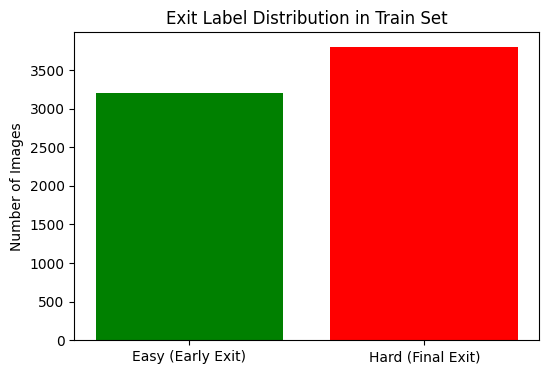

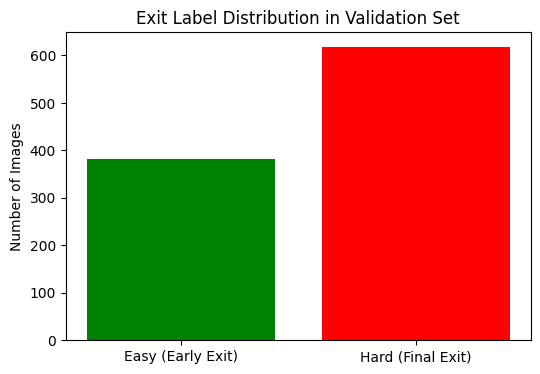

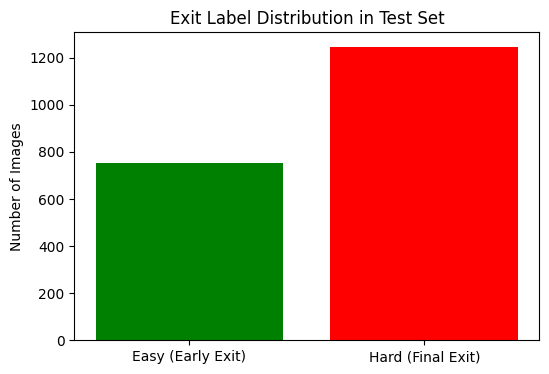

In [18]:
def plot_label_distribution(labels, split_name):
    counts = [0, 0]  # 0=easy, 1=hard
    for _, label in labels:
        counts[label] += 1

    plt.figure(figsize=(6,4))
    plt.bar(['Easy (Early Exit)', 'Hard (Final Exit)'], counts, color=['green', 'red'])
    plt.title(f'Exit Label Distribution in {split_name} Set')
    plt.ylabel('Number of Images')
    plt.show()

plot_label_distribution(train_labels, 'Train')
plot_label_distribution(val_labels, 'Validation')
plot_label_distribution(test_labels, 'Test')

In [19]:
import os
import csv

def save_labels_to_csv(labels, save_dir, split_name):
    os.makedirs(save_dir, exist_ok=True)
    csv_path = os.path.join(save_dir, f'{split_name}_labels.csv')
    with open(csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['image_name', 'exit_label'])
        for img_name, label in labels:
            writer.writerow([img_name, label])
    print(f"Saved {split_name} labels to {csv_path}")

save_dir = 'labels_multimetric_ds_0.95'

save_labels_to_csv(train_labels, save_dir, 'train')
save_labels_to_csv(val_labels, save_dir, 'val')
save_labels_to_csv(test_labels, save_dir, 'test')

Saved train labels to labels_multimetric_ds_0.95/train_labels.csv
Saved val labels to labels_multimetric_ds_0.95/val_labels.csv
Saved test labels to labels_multimetric_ds_0.95/test_labels.csv


In [20]:
import os
import pandas as pd
from PIL import Image
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
class ExitDataset(Dataset):
    def __init__(self, img_dir, csv_path, transform=None):
        self.img_dir = img_dir
        self.df = pd.read_csv(csv_path)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx, 0]
        label = int(self.df.iloc[idx, 1])
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

In [22]:
import os
from torch.utils.data import DataLoader
from torchvision import transforms

# --- Image transforms for classification models ---
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Training crop to 224x224
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),  # Keep aspect ratio then crop to 224x224
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# --- Dataset directories ---
labels_dir = '/kaggle/working/labels_multimetric_ds_0.95'

train_img_dir = "/kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/train/images"
val_img_dir   = "/kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/val/images"
test_img_dir  = "/kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/test/images"

train_csv = os.path.join(labels_dir, 'train_labels.csv')
val_csv   = os.path.join(labels_dir, 'val_labels.csv')
test_csv  = os.path.join(labels_dir, 'test_labels.csv')

# --- Create datasets (assuming ExitDataset can take transforms) ---
train_dataset = ExitDataset(train_img_dir, train_csv, train_transform)
val_dataset   = ExitDataset(val_img_dir, val_csv, val_test_transform)
test_dataset  = ExitDataset(test_img_dir, test_csv, val_test_transform)

# --- DataLoaders ---
train_loader = DataLoader(
    train_dataset, batch_size=16, shuffle=True,
    num_workers=4, persistent_workers=True, pin_memory=True
)

val_loader = DataLoader(
    val_dataset, batch_size=16, shuffle=False,
    num_workers=4, persistent_workers=True, pin_memory=True
)

test_loader = DataLoader(
    test_dataset, batch_size=16, shuffle=False,
    num_workers=4, persistent_workers=True, pin_memory=True
)

In [23]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, transforms
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [24]:
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    all_preds, all_labels = [], []

    for imgs, labels in tqdm(loader, desc="Training", leave=False):
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / len(loader.dataset)
    acc = accuracy_score(all_labels, all_preds)
    return epoch_loss, acc

def validate_epoch(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for imgs, labels in tqdm(loader, desc="Validating", leave=False):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * imgs.size(0)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / len(loader.dataset)
    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds)
    rec = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    return epoch_loss, acc, prec, rec, f1

In [25]:
# === CELL 1: Model Definitions ===
import timm
import torch.nn as nn
from torchvision import models
from torchvision.models import (
    MobileNet_V3_Small_Weights,
    EfficientNet_B0_Weights
)

class ViTTinyPredictor(nn.Module):
    def __init__(self, num_classes=2, pretrained=True):
        super().__init__()
        self.backbone = timm.create_model(
            'vit_tiny_patch16_224',
            pretrained=pretrained,
            num_classes=num_classes
        )
    def forward(self, x):
        return self.backbone(x)

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

In [26]:
# === CELL 2: Model Selection ===
models_to_train = {
    #"mobilenet_v3_small": (models.mobilenet_v3_small, MobileNet_V3_Small_Weights.DEFAULT),
    #"efficientnet_b0": (models.efficientnet_b0, EfficientNet_B0_Weights.DEFAULT),
    "vit_tiny": (ViTTinyPredictor, None)  # custom class, no weight enum
}

In [27]:
# === CELL 3: Train + Eval Loop ===
import copy

num_epochs = 100
patience = 15
results = {}

for model_name, (model_fn, weight_enum) in models_to_train.items():
    print(f"===== Training {model_name} =====")

    # Load proper model
    if model_name == "vit_tiny":
        model = model_fn(num_classes=2, pretrained=True).to(device)
    else:
        model = model_fn(weights=weight_enum).to(device)

    # Replace classifier only for torchvision models
    if model_name.startswith("mobilenet_v3") or model_name=="mobilenet_v2":
        in_features = model.classifier[-1].in_features
        model.classifier[-1] = nn.Linear(in_features, 2)
    elif model_name == "efficientnet_b0":
        in_features = model.classifier[-1].in_features
        model.classifier[-1] = nn.Linear(in_features, 2)

    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=5e-5)

    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None

    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, val_prec, val_rec, val_f1 = validate_epoch(model, val_loader, criterion, device)

        print(f"Epoch {epoch+1}/{num_epochs} | "
              f"Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f} F1: {val_f1:.4f}")

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = copy.deepcopy(model.state_dict())
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    # Restore best
    model.load_state_dict(best_model_state)

    # Final eval
    val_loss, val_acc, val_prec, val_rec, val_f1 = validate_epoch(model, val_loader, criterion, device)
    test_loss, test_acc, test_prec, test_rec, test_f1 = validate_epoch(model, test_loader, criterion, device)

    results[model_name] = {
        "val": {"loss": val_loss, "acc": val_acc, "prec": val_prec, "rec": val_rec, "f1": val_f1},
        "test": {"loss": test_loss, "acc": test_acc, "prec": test_prec, "rec": test_rec, "f1": test_f1}
    }

===== Training vit_tiny =====


model.safetensors:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 1/100 | Train Loss: 0.7026 Acc: 0.5296 | Val Loss: 0.6707 Acc: 0.5970 F1: 0.7164


Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 2/100 | Train Loss: 0.6897 Acc: 0.5480 | Val Loss: 0.6779 Acc: 0.5800 F1: 0.6734


Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 3/100 | Train Loss: 0.6832 Acc: 0.5561 | Val Loss: 0.6776 Acc: 0.6130 F1: 0.7589


Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 4/100 | Train Loss: 0.6764 Acc: 0.5713 | Val Loss: 0.6801 Acc: 0.5630 F1: 0.6518


Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 5/100 | Train Loss: 0.6600 Acc: 0.5989 | Val Loss: 0.7316 Acc: 0.4980 F1: 0.5192


Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 6/100 | Train Loss: 0.6288 Acc: 0.6394 | Val Loss: 0.7604 Acc: 0.4860 F1: 0.4238


Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 7/100 | Train Loss: 0.5735 Acc: 0.6894 | Val Loss: 0.8004 Acc: 0.4950 F1: 0.5005


Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 8/100 | Train Loss: 0.5035 Acc: 0.7496 | Val Loss: 0.8388 Acc: 0.5560 F1: 0.6378


Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 9/100 | Train Loss: 0.4143 Acc: 0.8056 | Val Loss: 0.9737 Acc: 0.5260 F1: 0.5893


Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 10/100 | Train Loss: 0.3354 Acc: 0.8531 | Val Loss: 1.1013 Acc: 0.5400 F1: 0.6278


Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 11/100 | Train Loss: 0.2629 Acc: 0.8901 | Val Loss: 1.1569 Acc: 0.5370 F1: 0.6317


Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 12/100 | Train Loss: 0.2189 Acc: 0.9119 | Val Loss: 1.3810 Acc: 0.5100 F1: 0.5471


Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 13/100 | Train Loss: 0.1730 Acc: 0.9299 | Val Loss: 1.3600 Acc: 0.5450 F1: 0.6218


Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 14/100 | Train Loss: 0.1314 Acc: 0.9499 | Val Loss: 1.6584 Acc: 0.5340 F1: 0.6044


Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 15/100 | Train Loss: 0.1269 Acc: 0.9490 | Val Loss: 1.7503 Acc: 0.5380 F1: 0.6345


Training:   0%|          | 0/438 [00:00<?, ?it/s]

Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Epoch 16/100 | Train Loss: 0.1077 Acc: 0.9587 | Val Loss: 1.8254 Acc: 0.4940 F1: 0.5153
Early stopping at epoch 16


Validating:   0%|          | 0/63 [00:00<?, ?it/s]

Validating:   0%|          | 0/125 [00:00<?, ?it/s]

In [28]:
print("===== Final Results =====")
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Validation - Loss: {metrics['val']['loss']:.4f} | Acc: {metrics['val']['acc']:.4f} | "
          f"Prec: {metrics['val']['prec']:.4f} | Rec: {metrics['val']['rec']:.4f} | F1: {metrics['val']['f1']:.4f}")
    print(f"Test       - Loss: {metrics['test']['loss']:.4f} | Acc: {metrics['test']['acc']:.4f} | "
          f"Prec: {metrics['test']['prec']:.4f} | Rec: {metrics['test']['rec']:.4f} | F1: {metrics['test']['f1']:.4f}")

===== Final Results =====

Model: vit_tiny
Validation - Loss: 0.6707 | Acc: 0.5970 | Prec: 0.6339 | Rec: 0.8236 | F1: 0.7164
Test       - Loss: 0.6702 | Acc: 0.5945 | Prec: 0.6337 | Rec: 0.8274 | F1: 0.7177
